 <div style="font-size: 34px">
<font color='blue'> <b>FROM DATA TO DELIGHT: BUILDING AN ANIME RECOMMENDER</b></font>



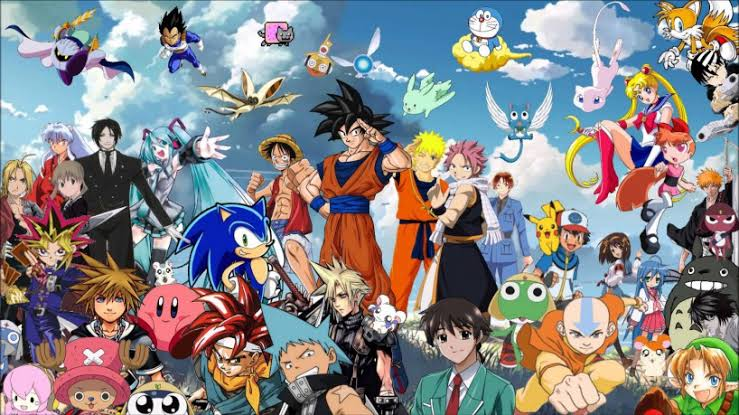

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
       * [1.1.1 Problem Statement](#sub_section_1_1_1)  
* <b>[2. Importing Packages](#chapter3)
* <b>[3. Loading Data](#chapter4)
* <b>[4. Data Cleaning](#chapter5)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter6)


#[1. Project Overview](#chapter1)
## [1.1 Introduction](#section_1_1)

In today's digital era, recommender systems play a crucial role in helping people find content that suits their interests. Platforms like Netflix, Amazon Prime, Showmax, and Disney rely on sophisticated algorithms to suggest movies and shows tailored to individual preferences. But have you ever wondered how these platforms seem to know your tastes so well?

This project aims to develop a recommender system specifically for anime titles, leveraging advanced machine learning techniques. The system will help anime fans discover new shows that match their unique preferences, making the viewing experience more enjoyable and personalized.

### [1.1.1 Problem Statement](#sub_section_1_1_1)

The primary goal of this project is to create a recommender system that can accurately predict how users will rate anime titles they haven't watched yet. We will achieve this by combining collaborative filtering and content-based filtering methods, using a comprehensive dataset from myanimelist.net.

Key challenges we will address include:

1. **Data Analysis and Preparation:** Cleaning and organizing the dataset to ensure it's suitable for building our models.
2. **Collaborative Filtering:** Developing a model that recommends anime based on the preferences of users with similar tastes.
3. **Content-Based Filtering:** Creating a model that suggests anime based on the characteristics of the titles a user has already enjoyed.
4. **Hybrid Approach:** Integrating both collaborative and content-based filtering methods to enhance recommendation accuracy.
5. **Evaluation and Optimization:** Testing our system and fine-tuning it to provide the best possible recommendations.

By tackling these challenges, we'll create a powerful recommender system that not only helps users discover new anime but also enhances their overall viewing
experience. This project highlights the impact of machine learning in revolutionizing how we find and enjoy content in the entertainment industry.


# [2. Importing Packages](#chapter3)

By importing these libraries, you prepare your environment to handle the entire machine learning pipeline, from data cleaning and model training and visualization. Each library and function has a specific role that contributes to building a robust and reliable machine learning model.

In [1]:
import pandas as pd
import numpy as np
import re
import html
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# [3. Loading Data](#chapter4)

This project utilizes a comprehensive dataset to develop our anime recommender system. The dataset includes information about various anime content, such as movies, television series, music, specials, OVAs (Original Video Animations), and ONAs (Original Net Animations). The data is divided into several files:
anime.csv: Contains details about each anime.
train.csv: Contains user rating data for individual anime titles.
test.csv: Used for creating the final submission.

The dataset can be accessed [here](https://www.kaggle.com/competitions/anime-recommender-system-project-2024/data)

By analyzing and utilizing this dataset, we aim to create a robust recommender system that helps users discover new anime titles that align with their preferences.

In [2]:
# Load and Define the datasets
anime_df = pd.read_csv('anime.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Exploring the Dataset

In this section, we will explore the dataset to understand its structure and the information it contains. The code snippets below provide an overview of the dataset's shape, the number of unique categories in the 'category' column, and metadata information about the dataset.

In [3]:
# Verify the loaded datasets
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
train_df.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [5]:
# Inspect the anime dataset
print(anime_df.info())
print(anime_df.describe())

# Inspect the train dataset
print(train_df.info())
print(train_df.describe())

# Inspect the test dataset
print(test_df.info())
print(test_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06
<class 'pandas.core.frame.DataFrame'>
Ra

# [5. Data Cleaning](#chapter5)

Data data cleaning, refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis or other purposes. It involves several tasks aimed at ensuring that the data is accurate, complete, and consistent.

It is an essential step in the data analysis process as it helps improve the quality, reliability, and usability of the data, leading to more accurate and insightful analysis results. Below are some common tasks involved in data clean up:

1. Check for Missing Values AND Handle Missing Values: identify missing values in the DataFrame and you can choose to drop rows with missing values, fill them with a specific value, or use more advanced imputation techniques.
2. Check for Duplicates AND Handle Duplicates: Identify duplicate rows in the DataFrame and if they are found, you can choose to drop them.
3. Decode HTML entities
4. Ensure correct data types
5. Remove non-alphanumeric characters
6. Convert text columns to lowercases
7. Remove Extra Whitespace
8. Finding Unique Categories




In [6]:
#1 Check for missing values
print(anime_df.isnull().sum())
print(train_df.isnull().sum())
print(test_df.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64
user_id     0
anime_id    0
dtype: int64


The information above comfirms that there are missing values in the anime.csv dataset and none in the train.csv and test.csv, therefor we need to handle the missing values in the anime.csv appropriately to ensure the dataset is clean and ready for analysis.

The code snippet below potrays the steps to handle the missing values for each column:



In [7]:
# Handle missing values in 'genre' by imputing with the most common genre
most_common_genre = anime_df['genre'].mode()[0]
anime_df['genre'].fillna(most_common_genre, inplace=True)

# Handle missing values in 'type' by imputing with the most common type
most_common_type = anime_df['type'].mode()[0]
anime_df['type'].fillna(most_common_type, inplace=True)

# Handle missing values in 'rating' by imputing with the average rating
mean_rating = anime_df['rating'].mean()
anime_df['rating'].fillna(mean_rating, inplace=True)

# Verify that there are no more missing values
print(anime_df.isnull().sum())



anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [8]:
#2 Check for duplicates based on all columns
print(anime_df.duplicated().sum())
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
1
0


The information above comfirms that there is 1 duplicate in the train_df and none in the anime_df and test_df, therefor we need to handle the duplicate in the train_df appropriately to ensure the dataset is clean and ready for analysis. Here is the step to handle the duplicate:

* Remove the duplicate by dropping it

In [9]:
# Remove duplicates
train_df.drop_duplicates(inplace=True)
# Verify that there are no more duplicates
print(anime_df.duplicated().sum())


0


In [10]:
#3 Clean the 'name' column by decoding HTML entities
anime_df['name'] = anime_df['name'].apply(html.unescape)

#4 Ensure correct data types
anime_df['rating'] = anime_df['rating'].astype(float)
anime_df['members'] = anime_df['members'].astype(int)

#5 Remove non-alphanumeric characters from the 'name' column
anime_df['name'] = anime_df['name'].apply(lambda x: re.sub(r'\W+', '', x))
#6 Convert name,genre and type columns to lowercases
anime_df['name'] = anime_df['name'].str.lower()
anime_df['genre'] = anime_df['genre'].str.lower()
anime_df['type'] = anime_df['type'].str.lower()

# Display the cleaned DataFrame
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,kiminonawa,"drama, romance, school, supernatural",movie,1,9.37,200630
1,5114,fullmetalalchemistbrotherhood,"action, adventure, drama, fantasy, magic, mili...",tv,64,9.26,793665
2,28977,gintama,"action, comedy, historical, parody, samurai, s...",tv,51,9.25,114262
3,9253,steinsgate,"sci-fi, thriller",tv,24,9.17,673572
4,9969,gintama,"action, comedy, historical, parody, samurai, s...",tv,51,9.16,151266


### Remove Extra Whitespace

**Purpose:** Extra whitespace (multiple spaces, tabs, etc.) can exist due to formatting or data collection processes and does not add meaningful information to the text.

**Benefit:** Cleaning up whitespace ensures uniformity in text presentation and makes subsequent text processing steps more consistent and reliable. It also improves readability and aesthetics when presenting or storing processed text data.

In [11]:
# Remove white spaces from 'name' and 'genre' columns
anime_df['name'] = anime_df['name'].str.replace(' ', '')
anime_df['genre'] = anime_df['genre'].str.replace(' ', '')

print(anime_df)

       anime_id                                        name  \
0         32281                                  kiminonawa   
1          5114               fullmetalalchemistbrotherhood   
2         28977                                     gintama   
3          9253                                  steinsgate   
4          9969                                     gintama   
...         ...                                         ...   
12289      9316       toushindaimyloverminamitaimechaminami   
12290      5543                                  underworld   
12291      5621                  violencegekigadavidnohoshi   
12292      6133  violencegekigashindavidnohoshiinmadensetsu   
12293     26081                  yasujinopornoramayacchimae   

                                                   genre   type episodes  \
0                      drama,romance,school,supernatural  movie        1   
1      action,adventure,drama,fantasy,magic,military,...     tv       64   
2      action,c

### Finding Unique Categories:

**Purpose:** To identify all distinct values in specific columns.
Benefits:
**Unique Genres:** By finding unique genres, we can understand the variety of genres present in the dataset and potentially group or filter data based on genre. This is useful for recommendations, filtering, and analysis.

**Unique Types:** Knowing the unique types (e.g., TV, Movie) helps in categorizing the data and understanding the distribution of different types of anime.

**Unique Names:** Identifying unique names ensures that there are no duplicates and helps in understanding the variety of entries in the dataset.


In [12]:
# Get unique categories
unique_genres = set()
anime_df['genre'].str.split(',').apply(unique_genres.update)

unique_types = anime_df['type'].unique()
unique_names = anime_df['name'].unique()

print("Unique Genres:")
print(unique_genres)
print("\nUnique Types:")
print(unique_types)
print("\nUnique Names:")
print(unique_names)

Unique Genres:
{'music', 'game', 'space', 'historical', 'police', 'ecchi', 'shounenai', 'martialarts', 'kids', 'shounen', 'demons', 'supernatural', 'yuri', 'magic', 'yaoi', 'seinen', 'parody', 'psychological', 'mystery', 'mecha', 'harem', 'superpower', 'sports', 'horror', 'fantasy', 'vampire', 'dementia', 'military', 'action', 'samurai', 'josei', 'shoujoai', 'hentai', 'shoujo', 'adventure', 'school', 'drama', 'romance', 'sci-fi', 'comedy', 'thriller', 'cars', 'sliceoflife'}

Unique Types:
['movie' 'tv' 'ova' 'special' 'music' 'ona']

Unique Names:
['kiminonawa' 'fullmetalalchemistbrotherhood' 'gintama' ...
 'violencegekigadavidnohoshi' 'violencegekigashindavidnohoshiinmadensetsu'
 'yasujinopornoramayacchimae']


# Exploratory Data Analysis

A crucial step in any machine learning project, including unsupervised learning. Here are some common EDA techniques and steps you can use for your unsupervised machine learning project:

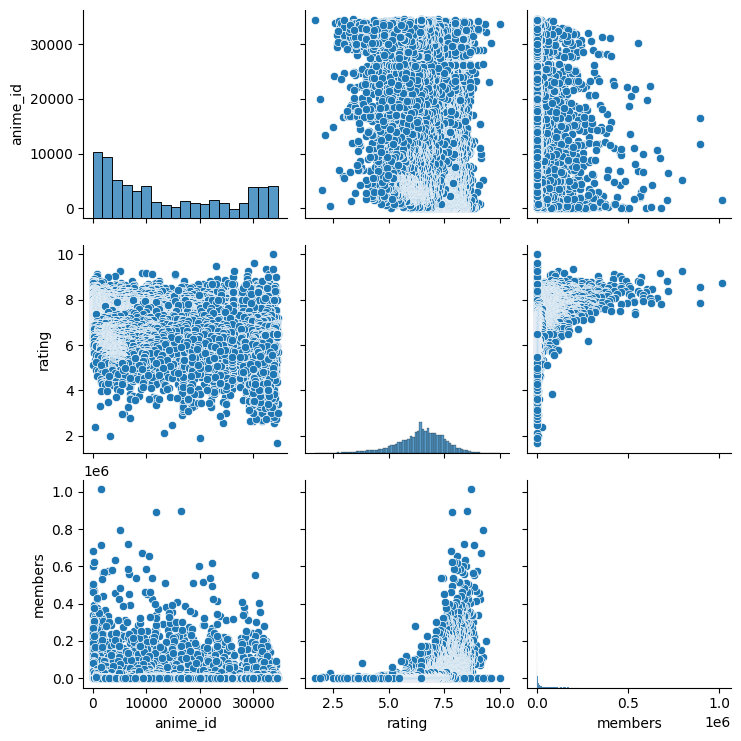

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Visualization
sns.pairplot(anime_df)
plt.show()

### Distribution of Ratings:

Histogram to visualize the distribution of ratings.
python


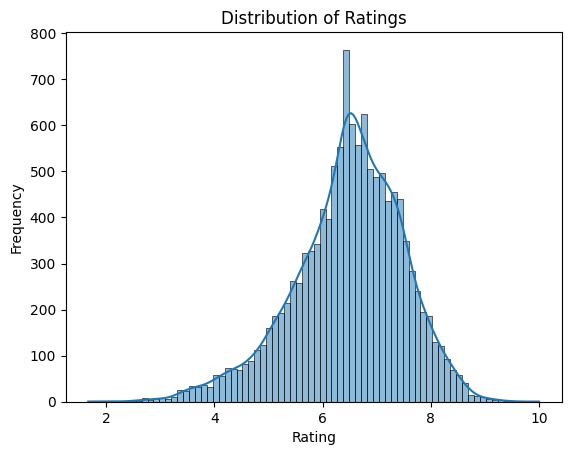

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(anime_df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### Distribution of Members:

Histogram to visualize the distribution of members.

In [15]:
import plotly.express as px

# Create an interactive box plot for the 'members' column
fig = px.box(anime_df, x='members', title='Distribution of Members')

# Show the plot
fig.show()


### Type Distribution:

Bar plot to visualize the distribution of anime types.

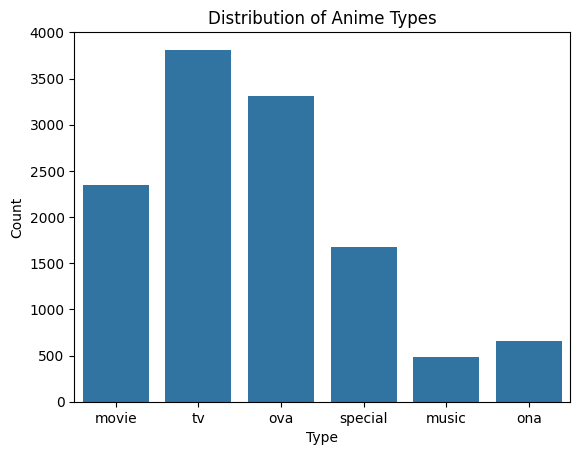

In [16]:
sns.countplot(x='type', data=anime_df)
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### Plotting the Most Watched Genre

To plot the most watched genre, we will follow these steps:

1. **Split the genres into individual genres for each anime.**
2. **Count the occurrences of each genre.**
3. **Plot the counts.**

Here’s the Python script using pandas and matplotlib to accomplish this:


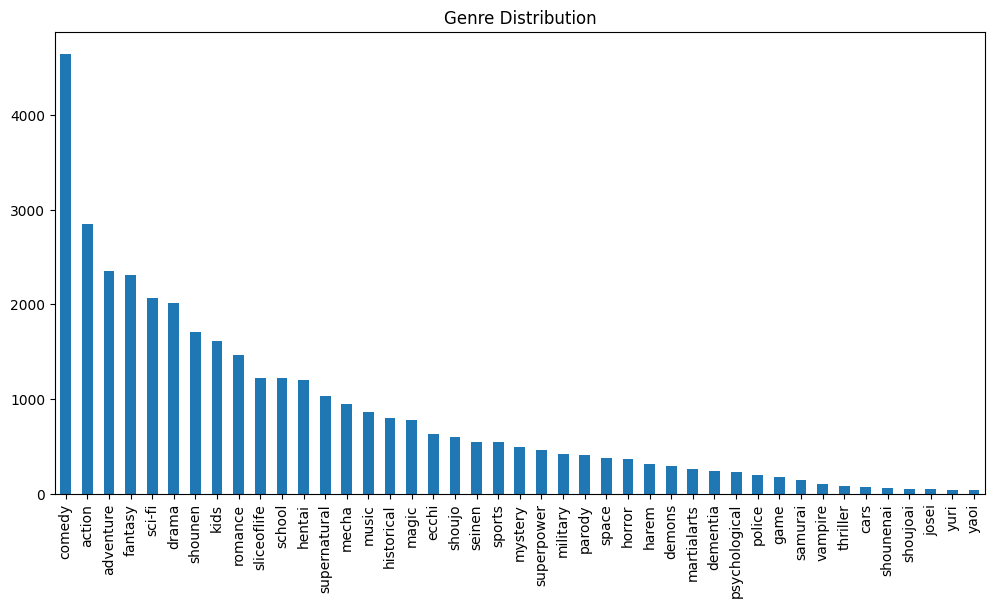

In [17]:
# Analysis of genres
genres = anime_df['genre'].str.get_dummies(sep=',')
genre_counts = genres.sum().sort_values(ascending=False)
genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Genre Distribution')
plt.show()

 #### Encoding Categorical Data
Convert categorical data to numerical data.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode 'type'
#type_encoder = LabelEncoder()
#anime_df['type'] = type_encoder.fit_transform(anime_df['type'])

# Encode 'genre'
# Use MultiLabelBinarizer since 'genre' has multiple values per row
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()
#anime_df = anime_df.join(pd.DataFrame(mlb.fit_transform(anime_df.pop('genre').str.split(',')),columns=mlb.classes_,index=anime_df.index))


In [19]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,kiminonawa,"drama,romance,school,supernatural",movie,1,9.37,200630
1,5114,fullmetalalchemistbrotherhood,"action,adventure,drama,fantasy,magic,military,...",tv,64,9.26,793665
2,28977,gintama,"action,comedy,historical,parody,samurai,sci-fi...",tv,51,9.25,114262
3,9253,steinsgate,"sci-fi,thriller",tv,24,9.17,673572
4,9969,gintama,"action,comedy,historical,parody,samurai,sci-fi...",tv,51,9.16,151266


### Correlation Matrix:

Calculate and visualize the correlation matrix to understand relationships between numerical features.


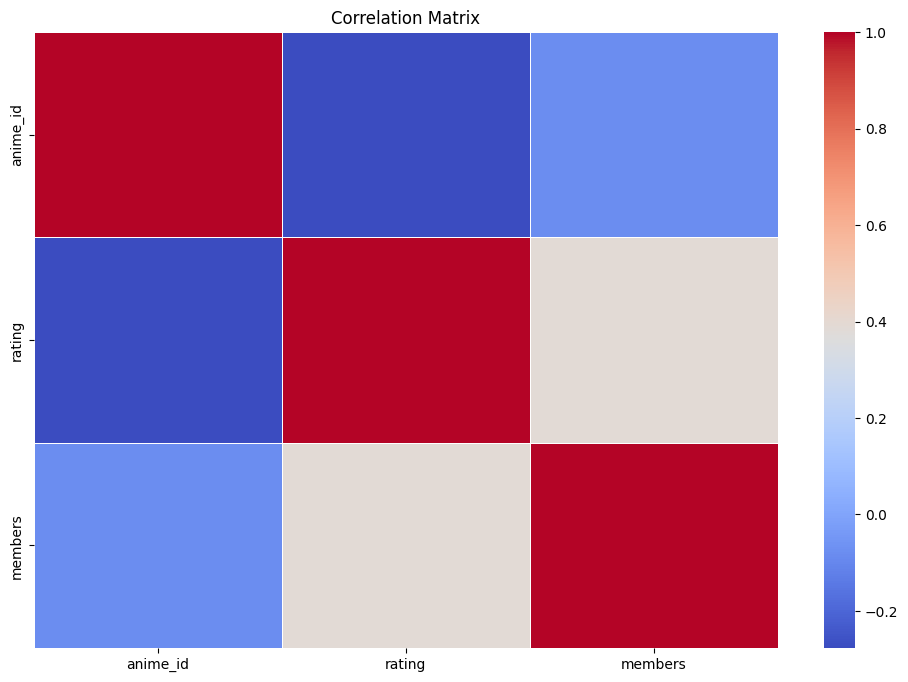

In [20]:
# Select only numeric columns
numeric_columns = anime_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### Dimensionality Reduction
**PCA:**

Apply PCA to reduce the dimensionality of the data for better visualization.

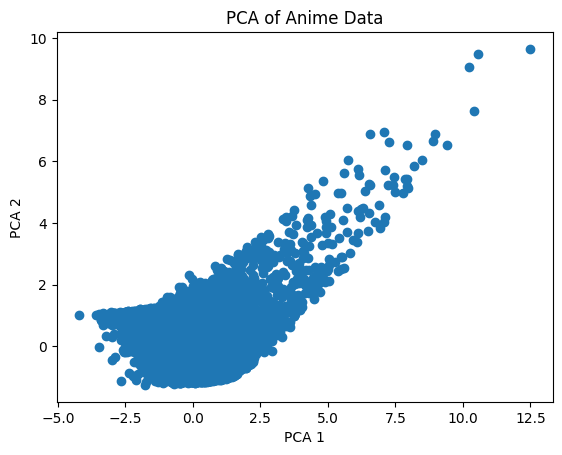

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Select only numeric columns
numeric_columns = anime_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the PCA components
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA of Anime Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()




7. Clustering for Initial Insights
K-means Clustering:

Apply K-means clustering to identify potential clusters within the data.

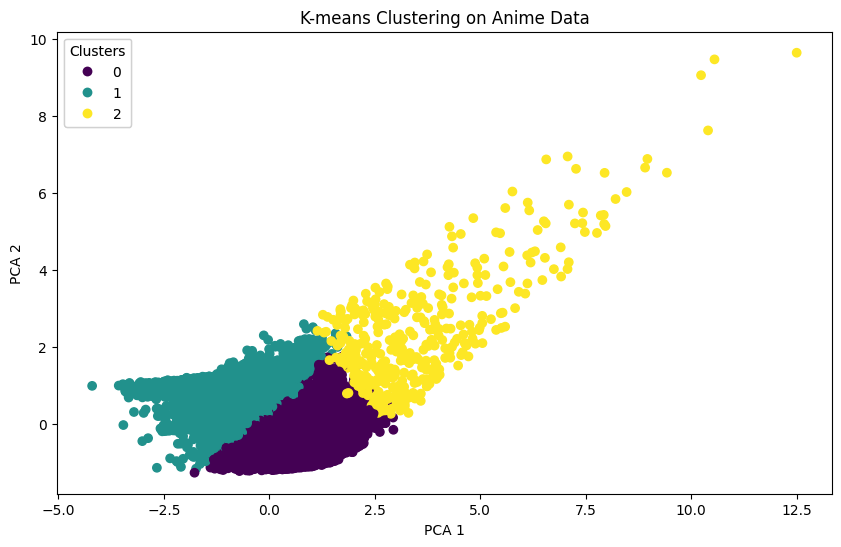

In [22]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'numeric_columns' contains only the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
anime_df['cluster'] = clusters

# Plot clusters with PCA components
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_title('K-means Clustering on Anime Data')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
plt.show()


### Train_df Analysis

In [23]:
# Unique counts
print('Number of unique users:', train_df['user_id'].nunique())
print('Number of unique animes:', train_df['anime_id'].nunique())


Number of unique users: 69481
Number of unique animes: 9838


#### Ratings per User
Analyze the number of ratings each user has provided.

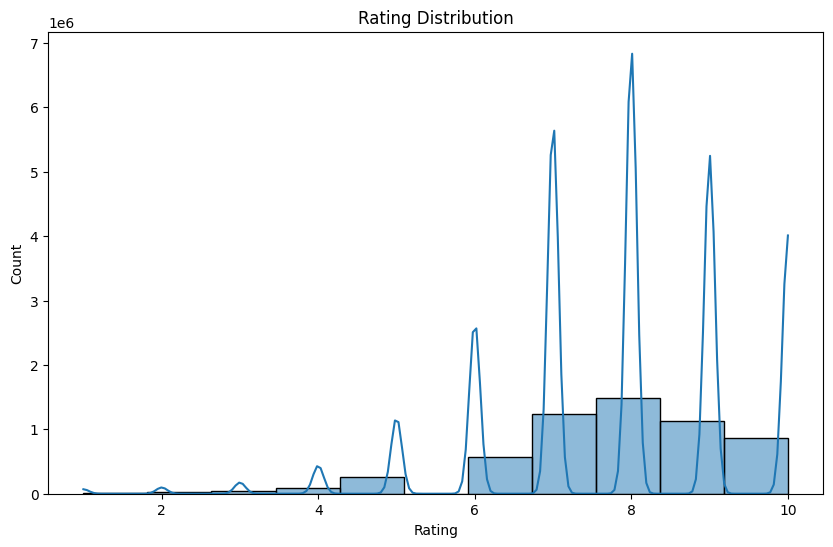

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=11, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


#### Ratings per Anime
Analyze the number of ratings each anime has received.

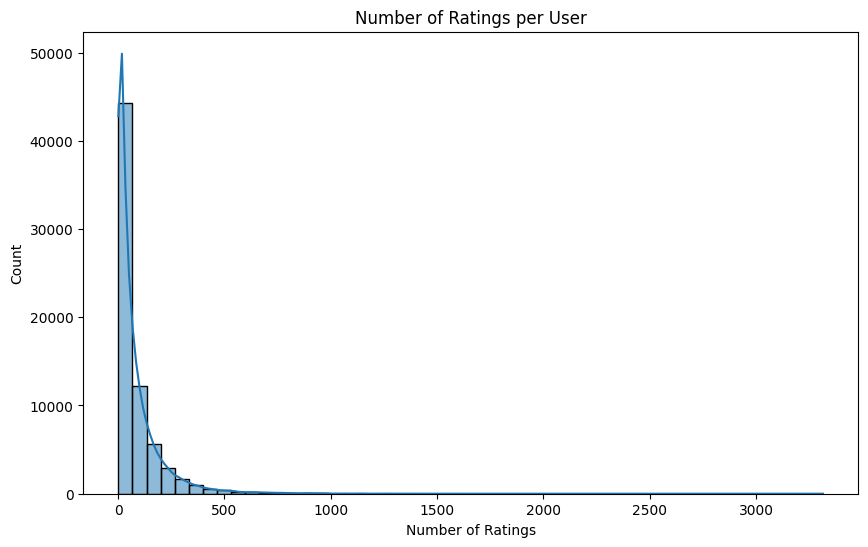

In [25]:
# Number of ratings per user
ratings_per_user = train_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()


#### Average Rating per Anime
Calculate and plot the average rating for each anime.

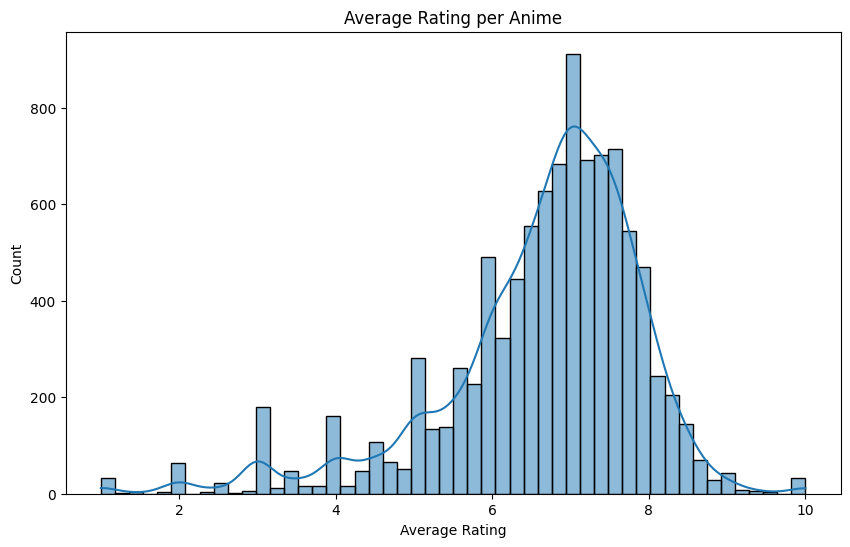

In [26]:
# Average rating per anime
average_rating_per_anime = train_df.groupby('anime_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(average_rating_per_anime, bins=50, kde=True)
plt.title('Average Rating per Anime')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()


#### Summary Statistics by User and Anime
Get summary statistics for each user and anime to understand their rating behavior.

In [27]:
# Summary statistics by user
user_summary = train_df.groupby('user_id')['rating'].agg(['count', 'mean', 'std', 'min', 'max'])
print(user_summary.describe())

# Summary statistics by anime
anime_summary = train_df.groupby('anime_id')['rating'].agg(['count', 'mean', 'std', 'min', 'max'])
print(anime_summary.describe())


              count          mean           std           min           max
count  69481.000000  69481.000000  65892.000000  69481.000000  69481.000000
mean      82.087952      8.225897      1.231010      5.241548      9.836229
std      122.218210      0.908715      0.483900      2.366113      0.547584
min        1.000000      1.000000      0.000000      1.000000      1.000000
25%       12.000000      7.661765      0.976328      4.000000     10.000000
50%       40.000000      8.190476      1.216893      5.000000     10.000000
75%      103.000000      8.818182      1.485864      7.000000     10.000000
max     3315.000000     10.000000      6.363961     10.000000     10.000000
              count         mean          std          min          max
count   9838.000000  9838.000000  8990.000000  9838.000000  9838.000000
mean     579.747205     6.649435     1.577596     2.706444     9.013112
std     1622.627853     1.292075     0.460761     1.844416     1.828894
min        1.000000     1.00

#### Heatmap
Visualize the co-occurrence matrix using a heatmap.



In [ ]:
# Create user-anime matrix
user_anime_matrix = train_df.pivot_table(index='user_id', columns='anime_id', values='rating', fill_value=0)

print(user_anime_matrix.head())
import matplotlib.pyplot as plt
import seaborn as sns

# Sample a subset for better visualization
sample_matrix = user_anime_matrix.iloc[:50, :50]  # Adjust the size as needed

plt.figure(figsize=(12, 10))
sns.heatmap(sample_matrix, cmap="YlGnBu", cbar=True)
plt.title('User-Anime Rating Heatmap')
plt.xlabel('Anime ID')
plt.ylabel('User ID')
plt.show()

#### User-Anime Interaction Matrix
Calculate interaction statistics like the number of ratings per user for each anime.

In [ ]:
# Number of ratings per user
user_interaction_counts = train_df.groupby('user_id')['anime_id'].count()
print(user_interaction_counts.describe())

# Number of ratings per anime
anime_interaction_counts = train_df.groupby('anime_id')['user_id'].count()
print(anime_interaction_counts.describe())


#### Clustering
Use clustering techniques like K-means to identify groups of similar users based on their anime ratings.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Fill missing values
user_anime_matrix_filled = user_anime_matrix.replace(0, user_anime_matrix.mean(axis=0))

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
user_anime_pca = pca.fit_transform(user_anime_matrix_filled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
user_clusters = kmeans.fit_predict(user_anime_pca)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(user_anime_pca[:, 0], user_anime_pca[:, 1], c=user_clusters, cmap='viridis', s=50)
plt.title('User Clusters Based on Anime Ratings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
